In [1]:
import pandas as pd 
#파일경로를 찾고 변수 file_path에 저장
file_path= 'C:/Users/victo/anaconda3/python/실습데이터/bicycle.csv'

#read csv()함수로 데이터프레임 변환 
df = pd.read_csv(file_path, engine='python')
df

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0
2,SPB-21097,2019-11-04 8:46,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-04 8:57,3,중랑센터,7.0,10.0,NaN
3,SPB-22292,2019-11-05 8:34,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-05 8:45,3,중랑센터,NaN,10.0,1380.0
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0
...,...,...,...,...,...,...,...,...,...,...,...
415,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.0,11.0,2200.0
416,SPB-17768,2019-11-15 9:31,103,망원역 2번출구 앞,14.0,2019-11-15 9:37,101,(구)합정동 주민센터,NaN,5.0,NaN
417,SPB-18841,2019-11-15 20:40,113,홍대입구역 2번출구 앞,24.0,2019-11-15 20:53,101,(구)합정동 주민센터,1.0,12.0,2280.0
418,SPB-24467,2019-11-15 21:55,152,마포구민체육센터 앞,18.0,2019-11-15 22:05,101,(구)합정동 주민센터,1.0,10.0,1180.0


>결측치 처리

In [5]:
# 결측DATA 확인 및 제거
df.isnull( ) # 결측데이터 확인, 결측데이터가 아닌경우 df.notnull()
df.isnull().sum() # 결측값 개수
df.isnull().sum(1) # 행단위 결측값 개수
df.notnull().sum(1) # 행단위 결측값 아닌 것 개수

0      11
1      11
2      10
3      10
4      11
       ..
415    11
416     9
417    11
418    11
419    11
Length: 420, dtype: int64

In [6]:
# 결측치 제거
df_drop_allrow = df.dropna(axis=0) #결측치가 있는 전체 행 제거, 만약 결측치가 있는 열을 제거하려면 axis=1로 해서 적용할것!
df['대여소번호'].dropna() # 특정 열 제거
df[['대여소번호','대여거치대','이용시간']].dropna(axis=0) # 행기준 삭제
df[['대여소번호','대여거치대','이용시간']].dropna(axis=1) # 열기준 삭제

,대여소번호
0,646
1,646
2,646
3,646
4,512
...,...
415,112
416,103
417,113
418,152


In [ ]:
# 결측치 대체
df_1 = df.fillna(0) #결측값을 특정 값(0)으로 대체
df_2 = df.대여소번호.fillna(0) #특정 컬럼 결측값(대여소번호)을 특정 값(0)으로 대체
df_3 = df.fillna('missing') #결측값을 문자열('missing')로 대체
df_4 = df.fillna(df.mean()) # 각 칼럼의 평균을 구해서 대응하는 칼럼의 결측값을 대체하는 방법, 가장 많이 사용
df_5 = df.fillna(df.mean()['이용거리']) #특정항목 평균(여기서는 이용거리)으로 대체 
df_6 = df.이용거리.fillna(df.mean()['이용거리']) # 이용거리 평균을 구해서 이용거리 na에 값을 넣어줌

>이상치 확인 및 제거

In [15]:
import pandas as pd 
#파일경로를 찾고 변수 file_path에 저장
file_path= 'C:/Users/victo/anaconda3/python/실습데이터/bicycle.csv'

#read csv()함수로 데이터프레임 변환 
df = pd.read_csv(file_path, engine='python')
df

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0
2,SPB-21097,2019-11-04 8:46,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-04 8:57,3,중랑센터,7.0,10.0,NaN
3,SPB-22292,2019-11-05 8:34,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-05 8:45,3,중랑센터,NaN,10.0,1380.0
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0
...,...,...,...,...,...,...,...,...,...,...,...
415,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.0,11.0,2200.0
416,SPB-17768,2019-11-15 9:31,103,망원역 2번출구 앞,14.0,2019-11-15 9:37,101,(구)합정동 주민센터,NaN,5.0,NaN
417,SPB-18841,2019-11-15 20:40,113,홍대입구역 2번출구 앞,24.0,2019-11-15 20:53,101,(구)합정동 주민센터,1.0,12.0,2280.0
418,SPB-24467,2019-11-15 21:55,152,마포구민체육센터 앞,18.0,2019-11-15 22:05,101,(구)합정동 주민센터,1.0,10.0,1180.0


In [18]:
df.drop(4) # 4번 index 행 삭제

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0
2,SPB-21097,2019-11-04 8:46,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-04 8:57,3,중랑센터,7.0,10.0,NaN
3,SPB-22292,2019-11-05 8:34,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-05 8:45,3,중랑센터,NaN,10.0,1380.0
5,SPB-18401,2019-11-06 8:52,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:09,3,중랑센터,7.0,11.0,1350.0
...,...,...,...,...,...,...,...,...,...,...,...
415,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.0,11.0,2200.0
416,SPB-17768,2019-11-15 9:31,103,망원역 2번출구 앞,14.0,2019-11-15 9:37,101,(구)합정동 주민센터,NaN,5.0,NaN
417,SPB-18841,2019-11-15 20:40,113,홍대입구역 2번출구 앞,24.0,2019-11-15 20:53,101,(구)합정동 주민센터,1.0,12.0,2280.0
418,SPB-24467,2019-11-15 21:55,152,마포구민체육센터 앞,18.0,2019-11-15 22:05,101,(구)합정동 주민센터,1.0,10.0,1180.0


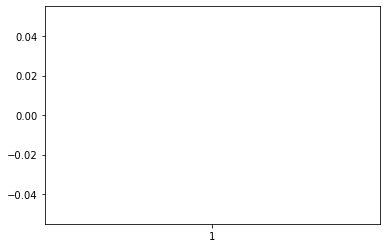

In [23]:
# matplotlib 활용 - 시각화 이상치 값 확인이 가능
import matplotlib as mpl       #맷플롭립
import matplotlib.pylab as plt   #맷플롭립.파이랩

plt.boxplot(df['이용거리'])
plt.show()

>중복데이터 확인 및 제거